In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()

In [6]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [125]:
df.head(7)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556


In [8]:
df.shape

(39644, 61)

In [9]:
df.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

# Clean The Data

In [10]:
#Check for missing numbers

missing_values = df[df.isnull().any(axis=1)]
missing_values.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


In [11]:
max(missing_values.isna().sum())

0

##### There are no missing values, and the data set appears to be super clean, with dummies already included.

In [12]:
#Reverse-clean for visualization purposes
df_rev = df.copy()
df_rev.columns = df_rev.columns.str.replace(' ','')

In [13]:
df_rev.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [14]:
df_rev['Channel'] = 'Other'

In [15]:
col_channel = {'data_channel_is_lifestyle':'Lifestyle','data_channel_is_entertainment':'Entertainment',
               'data_channel_is_bus':'Business',
               'data_channel_is_socmed':'Social_Media', 'data_channel_is_tech':"Tech",
               'data_channel_is_world':'World'}

for i in col_channel.keys():
    df_rev['Channel'] = np.where(df_rev[i]==1.0, col_channel[i],df_rev['Channel'])


In [16]:
df_rev[df_rev['Channel']=='0']['url']
df_rev['Channel'].value_counts()

World            8427
Tech             7346
Entertainment    7057
Business         6258
Other            6134
Social_Media     2323
Lifestyle        2099
Name: Channel, dtype: int64

In [17]:
day_channel = {'weekday_is_monday':'Monday', 'weekday_is_tuesday':'Tuesday',
       'weekday_is_wednesday':'Wednesday', 'weekday_is_thursday':'Thursday', 'weekday_is_friday':'Friday',
       'weekday_is_saturday':'Saturday', 'weekday_is_sunday':'Sunday'}

df_rev['Day_of_Week'] = None

for i in day_channel.keys():
    df_rev['Day_of_Week'] = np.where(df_rev[i]==1, day_channel[i],df_rev['Day_of_Week'])

In [18]:
cols_drop = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday','data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

df_rev.drop(columns=cols_drop, inplace=True)

In [19]:
df_rev.shape

(39644, 50)



# Visualize

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title('Correlation matrix',fontsize=24)

plt.show()

In [ ]:
df_rev.shape

In [ ]:
df_rev['Channel'].isna().sum()

In [ ]:
df_agg_C = df_rev.groupby(['Channel'])['shares'].agg(['mean','sum',np.size]).reset_index()

In [ ]:
df_agg_C.set_index('Channel',inplace=True)

In [ ]:
df_agg_C.sort_values(by='mean',inplace=True, ascending=False)
df_agg_C

In [ ]:
sns.set()

In [ ]:
cross = pd.crosstab(df_rev.Channel,df_rev.Day_of_Week)


In [ ]:
cross.sum()

In [ ]:
colors1 = sns.color_palette("GnBu_d", len(df_agg_C.index))
colors2 = sns.color_palette("BuGn_d", len(df_agg_C.index))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))
df_agg_C = df_agg_C[df_agg_C.index != 'Other']

ax = sns.barplot(y = df_agg_C.index, x = df_agg_C['mean'], orient='h', palette = colors1, ax=ax1)
ax = sns.barplot(y = df_agg_C.index, x = df_agg_C['size'], orient='h', palette = colors2, ax=ax2)

ax1.set_xlabel(xlabel='Average Number of Shares per Article', fontsize=16)
ax1.set_ylabel(ylabel="Channel", fontsize=16)
ax1.set_title(label="Average Number of Shares on Social per Article, by Channel", fontsize=22)

ax2.set_xlabel(xlabel='Number of Articles', fontsize=16)
ax2.set_ylabel(ylabel="Channel", fontsize=16)
ax2.set_title(label="Count of Articles", fontsize=22)


plt.show()

In [ ]:
df_agg2 = df_rev.groupby(['Day_of_Week'])['shares'].agg(['mean','sum',np.size])
df_agg2 = df_agg2.sort_values('mean',ascending=False)

In [ ]:
df_agg2

In [ ]:
sns.set()

In [ ]:
colors1 = sns.color_palette("Blues_d", len(df_agg2.index))
colors2 = sns.color_palette("BuGn_d", len(df_agg2.index))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))

plt.figure(figsize=(16,8))

ax = sns.barplot(y = df_agg2.index, x = df_agg2['mean'], orient='h', palette = colors1, ax=ax1)
ax = sns.barplot(y = df_agg2.index, x = df_agg2['size'], orient='h', palette = colors2, ax=ax2)

ax1.set_xlabel(xlabel='Average Number of Sharesper Article, by Day of Week Released', fontsize=16)
ax1.set_ylabel(ylabel="Day", fontsize=16)
ax1.set_title(label="Average Number of Shares on Social per Article", fontsize=24)

ax2.set_xlabel(xlabel='Number of Articles by Day Released', fontsize=16)
ax2.set_ylabel(ylabel="Day", fontsize=16)
ax2.set_title(label="Count of Articles", fontsize=24)


plt.show()

In [ ]:
cross = cross[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(16,8))
sns.heatmap(cross,cmap="viridis", annot=True, fmt="d")
plt.title('Total Number of Articles',fontsize=24)

plt.show()

In [ ]:
df_rev1 = df_rev[df_rev['Channel']!='Other']

ch = ['Entertainment','Business','Tech','Lifestyle','World','Social_Media']


medians = df_rev1.groupby(['Channel'])['shares'].median()
medians = medians[ch].values

median_labels = [str(np.round(s, 2)) for s in medians]


means = df_rev1.groupby(['Channel'])['shares'].mean()
means = means[ch].values
mean_labels = [str(np.round(s, 2)) for s in means]

plt.figure(figsize=(18,9))

ax = sns.boxplot(x=df_rev1['Channel'], y=df_rev1['shares'],data=df_rev1, hue='is_weekend', palette='RdPu', 
                 showfliers=False, showmeans=True, linewidth=3.)
ax.set_ylabel(ylabel='# Shares on Social', fontsize=20)
ax.set_title(label='Article Shares by Channel', fontsize=20)

leg = ax.get_legend()

new_title = 'Weekend?'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], f'med={median_labels[tick]}', 
            horizontalalignment='center', size='x-small', color='c', weight='semibold',fontsize=20)
    ax.text(pos[tick], means[tick], f'mean={mean_labels[tick]}', 
            horizontalalignment='center', size='x-small', color='g', weight='bold',fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(8,6))



ax = sns.scatterplot(y='shares',x='n_tokens_content',data=df_rev, hue='is_weekend') #Hue
ax.set_xlabel(xlabel='Article Word Count', fontsize=16)
ax.set_ylabel(ylabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Length of Article', fontsize=20)
ax.set_ylim(0,120000)


plt.show()

In [ ]:
df_rev.columns

In [ ]:
plt.figure(figsize=(8,6))



ax = sns.scatterplot(y='shares',x='global_subjectivity',data=df_rev, hue='Channel') #Hue
ax.set_xlabel(xlabel='Global Subjectivity Score', fontsize=16)
ax.set_ylabel(ylabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Subjectivity', fontsize=20)
ax.set_ylim(0,150000)

plt.show()

In [ ]:
plt.figure(figsize=(8,6))



ax = sns.scatterplot(x='global_sentiment_polarity',y='shares',data=df_rev, hue='Channel') #Hue
ax.set_ylabel(ylabel='Number of Shares', fontsize=16)
ax.set_xlabel(xlabel='Global Sentiment Polarity', fontsize=16)
ax.set_title(label='Shares by Global Sentiment', fontsize=20)
ax.set_ylim(0,150000)

plt.show()

In [ ]:
df_rev['num_imgs'].describe()

# Remove Outliers

In [20]:
#def iqr_fun():
    
for i in ['shares']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ = Q75+1.5*IQR
    sMinQ = max(Q25-1.5*IQR,0.0)
    print(sMinQ, sMaxQ)

0.0 5581.0


In [23]:
sns.set()

In [ ]:
df_rev.shape

In [21]:
df_rev['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

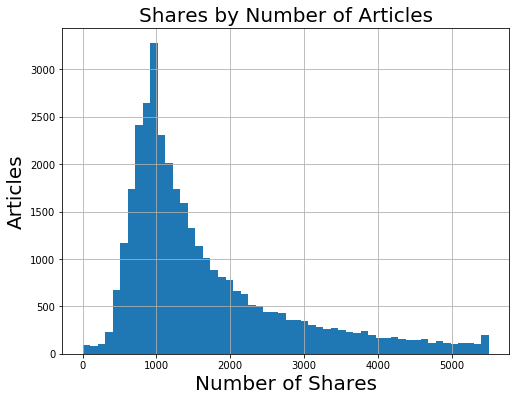

In [22]:
plt.figure(figsize=(8,6))

df1 = df_rev[(df_rev['shares']<sMaxQ) & (df_rev['shares']>sMinQ)  ]

ax= df1['shares'].hist(bins=54)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Shares', fontsize=20)
ax.set_title(label='Shares by Number of Articles', fontsize=20)

plt.show()

#### Number of Words in Article

In [24]:
#def iqr_fun():
    
for i in ['n_tokens_content']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = Q75+1.5*IQR
    MinQ = max(Q25-1.5*IQR,0.0)
    print(MinQ, MaxQ)

0.0 1421.0


In [25]:
df_revO = df_rev[(df_rev['n_tokens_content']<MaxQ) & (df_rev['n_tokens_content']>MinQ)  ]

In [26]:
df_rev.shape

(39644, 50)

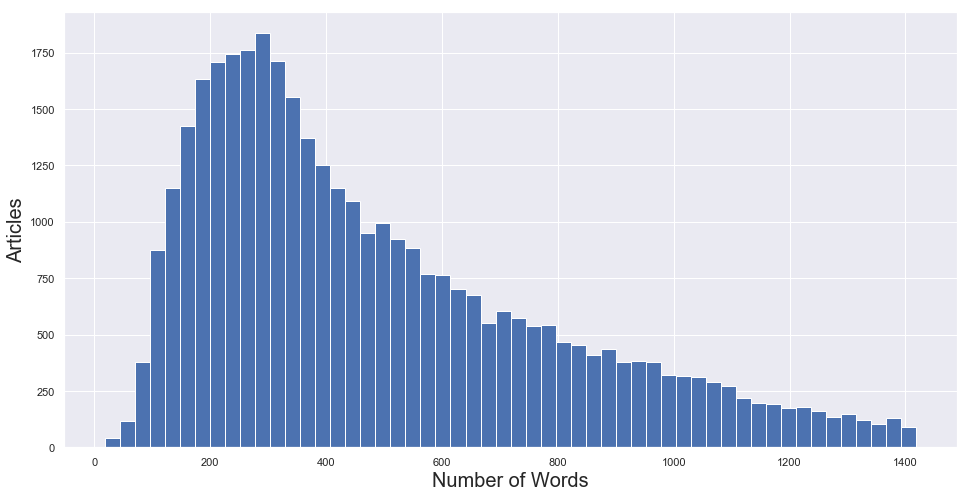

In [27]:
plt.figure(figsize=(16,8))


ax= df_revO['n_tokens_content'].hist(bins=54)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Words', fontsize=20)

plt.show()

In [ ]:
for i in ['num_videos']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = Q75+2*IQR
    MinQ = max(Q25-1.5*IQR,0.0)
    print(MinQ, MaxQ)

In [ ]:
df_revO = df_revO[(df_revO['num_videos']<=MaxQ) & (df_revO['num_videos']>=MinQ)  ]

In [ ]:
df_revO.shape

In [ ]:
plt.figure(figsize=(16,8))

ax= df_revO['num_videos'].hist(bins=4)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Videos', fontsize=20)

plt.show()

# Develop Model for Analysis

In [28]:
df.columns = df.columns.str.replace(' ','')

In [29]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [30]:
dff = df.copy()

def iqr_fun(i,dff):
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = round(Q75+1.5*IQR,0)+1
    MinQ = round((Q25-1.5*IQR),0)-1
    print(MinQ, MaxQ)
    return [MinQ, MaxQ]

In [31]:
dff.shape

(39644, 61)

In [32]:
dff.drop(['url','timedelta'],axis=1,inplace=True)

In [33]:
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    vif_array = np.array([])
    tolerance_array = np.array([])
    
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared = smf.ols(formula, data=data).fit().rsquared   #rsquared is the fitting of the model.
        
        vif = 1/(1-r_squared)
        vif_array = np.append(vif_array,vif).round(2)
        
        tolerance = 1-r_squared
        tolerance_array = np.append(tolerance_array,tolerance).round(2)
    
    df_vif = pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [48]:
get_vif(exogs=dff.columns,data=dff)

C:\Users\Tom N\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


,VIF,Tolerance
n_tokens_title,1.100000e+00,0.91
n_tokens_content,3.320000e+00,0.30
n_unique_tokens,1.367823e+04,0.00
n_non_stop_words,2.866077e+05,0.00
n_non_stop_unique_tokens,8.483750e+03,0.00
num_hrefs,1.730000e+00,0.58
num_self_hrefs,1.410000e+00,0.71
num_imgs,1.650000e+00,0.60
num_videos,1.250000e+00,0.80
average_token_length,1.261000e+01,0.08


In [34]:
df_v = dff.copy()

In [35]:
df_v.drop(['is_weekend'],axis=1,inplace=True)
df_v.drop(['weekday_is_monday'],axis=1,inplace=True)
df_v.drop(['LDA_04'],axis=1,inplace=True)
df_v.drop(['n_unique_tokens'],axis=1,inplace=True)
df_v.drop(['n_non_stop_unique_tokens'],axis=1,inplace=True)
df_v.drop(['self_reference_avg_sharess'],axis=1,inplace=True)
df_v.drop(['rate_positive_words'],axis=1,inplace=True)
df_v.drop(['kw_max_min'],axis=1,inplace=True)

In [37]:
get_vif(exogs=df_v.columns,data=df_v)

,VIF,Tolerance
n_tokens_title,1.09,0.92
n_tokens_content,2.19,0.46
n_non_stop_words,1.00,1.00
num_hrefs,1.64,0.61
num_self_hrefs,1.37,0.73
num_imgs,1.43,0.70
num_videos,1.24,0.81
average_token_length,2.95,0.34
num_keywords,1.49,0.67
data_channel_is_lifestyle,2.32,0.43


In [38]:
df_v.shape

(39644, 51)

In [39]:
columns_out_v = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', "kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares"]

for n in columns_out_v:
    print(n)
    
    q = iqr_fun(n,df_v)
    print(q)
    
    df_v = df_v[(df_v[n]<=q[1]) & (df_v[n]>=q[0])  ]

n_tokens_title
3.0 17.0
[3.0, 17.0]
n_tokens_content
-460.0 1422.0
[-460.0, 1422.0]
num_hrefs
-11.0 27.0
[-11.0, 27.0]
num_self_hrefs
-5.0 9.0
[-5.0, 9.0]
num_imgs
-1.0 5.0
[-1.0, 5.0]
num_videos
-3.0 3.0
[-3.0, 3.0]
num_keywords
1.0 15.0
[1.0, 15.0]
kw_min_min
-9.0 13.0
[-9.0, 13.0]
kw_avg_min
-158.0 602.0
[-158.0, 602.0]
kw_min_max
-11851.0 19751.0
[-11851.0, 19751.0]
kw_max_max
843299.0 843301.0
[843299.0, 843301.0]
kw_avg_max
8396.0 520626.0
[8396.0, 520626.0]
kw_min_avg
-2359.0 3930.0
[-2359.0, 3930.0]
kw_max_avg
862.0 7984.0
[862.0, 7984.0]
kw_avg_avg
1089.0 4240.0
[1089.0, 4240.0]
self_reference_min_shares
-2066.0 5240.0
[-2066.0, 5240.0]
self_reference_max_shares
-4340.0 9484.0
[-4340.0, 9484.0]


In [40]:
df_v.shape

(11519, 51)

In [41]:
columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:

    
    q = iqr_fun(n,dff)
    
    dff = dff[(dff[n]<=q[1]) & (dff[n]>=q[0])  ]
    
    #print(dff.shape)

3.0 17.0
-460.0 1422.0
-11.0 27.0
-5.0 9.0
-1.0 5.0
-3.0 3.0
1.0 15.0
-9.0 13.0
-419.0 1851.0
-127.0 533.0
-12601.0 21001.0
843299.0 843301.0
9624.0 521906.0
-2367.0 3944.0
887.0 7933.0
1092.0 4223.0
-1896.0 4978.0
-4169.0 9221.0
-1876.0 4966.0


In [42]:
df_v.shape

(11519, 51)

In [43]:
dff.shape

(10793, 59)

# Categorize Shares into Bins. Start with 2.

### Reduced df_v

In [44]:
for i in ['shares']:
    Q25 = df_v[i].quantile(0.25)
    Q75 = df_v[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ = Q75+1.5*IQR
    sMinQ = max(Q25-1.5*IQR,0.0)
    print(sMinQ, sMaxQ)

0.0 3477.25


In [45]:
round(sMaxQ,-2)

3500.0

In [46]:
df_v = df_v[df_v.shares<=(round(sMaxQ,-2))]

In [47]:
df_v.shares.describe()

count    10223.000000
mean      1279.780202
std        668.623119
min          5.000000
25%        815.500000
50%       1100.000000
75%       1600.000000
max       3500.000000
Name: shares, dtype: float64

In [48]:
df_v.reset_index(drop=True, inplace=True)

In [49]:
ser, bins = pd.qcut(df_v["shares"], 2, retbins=True, labels=['poor','good'])
df_v['share_cat'] = pd.cut(df_v["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [50]:
df_v.drop(['shares'],axis=1,inplace=True)

In [51]:
from sklearn.model_selection import train_test_split

X_tr1, X_t1, y_tr1,y_t1 = train_test_split(df_v.drop('share_cat',axis=1), df_v['share_cat'], test_size=0.2)

In [124]:
df_v.dtypes

n_tokens_title                    float64
n_tokens_content                  float64
n_non_stop_words                  float64
num_hrefs                         float64
num_self_hrefs                    float64
num_imgs                          float64
num_videos                        float64
average_token_length              float64
num_keywords                      float64
data_channel_is_lifestyle         float64
data_channel_is_entertainment     float64
data_channel_is_bus               float64
data_channel_is_socmed            float64
data_channel_is_tech              float64
data_channel_is_world             float64
kw_min_min                        float64
kw_avg_min                        float64
kw_min_max                        float64
kw_max_max                        float64
kw_avg_max                        float64
kw_min_avg                        float64
kw_max_avg                        float64
kw_avg_avg                        float64
self_reference_min_shares         

In [52]:
from sklearn.linear_model import LogisticRegression

log_model1 = LogisticRegression()

log_model1.fit(X_tr1,y_tr1)

y_p_tr1= log_model1.predict(X_tr1)
y_p_t1= log_model1.predict(X_t1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [56]:
acc_score_tr1 = accuracy_score(y_tr1, y_p_tr1)
acc_score_t1 = accuracy_score(y_t1, y_p_t1)

print("Acc Score on traning set: {}".format(acc_score_tr1))
print("Acc Score on testing set: {}".format(acc_score_t1)) 
print("")

bacc_score_tr1 = balanced_accuracy_score(y_tr1, y_p_tr1)
bacc_score_t1 = balanced_accuracy_score(y_t1, y_p_t1)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr1))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t1)) 

precision_tr3 = precision_score(y_tr1, y_p_tr1)
precision_t3 = precision_score(y_t1, y_p_t1)

print("Precision Score on training set: {}".format(precision_tr3))
print("Precision Score on testing set: {}".format(precision_t3)) 
print("")

recall_tr3 = recall_score(y_tr1, y_p_tr1)
recall_t3 = recall_score(y_t1, y_p_t1)

print("Recall Score on training set: {}".format(recall_tr3))
print("Recall Score on testing set: {}".format(recall_t3)) 
print("")

f1_score_tr = f1_score(y_tr1, y_p_tr1)
f1_score_t = f1_score(y_t1, y_p_t1)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6029591587185131
Acc Score on testing set: 0.615158924205379

Balanced Acc Score on traning set: 0.5865779685017729
Balanced Acc Score on testing set: 0.5958526570048309
Precision Score on training set: 0.5869731800766284
Precision Score on testing set: 0.6091954022988506

Recall Score on training set: 0.41394217778978654
Recall Score on testing set: 0.4032608695652174

F1 Score on training set: 0.48550150530819197
F1 Score on testing set: 0.4852844996729889


In [126]:
logmodel1.params

NameError: name 'logmodel1' is not defined

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_t1, y_p_t1)

array([[887, 238],
       [549, 371]], dtype=int64)

In [77]:
sns.set()

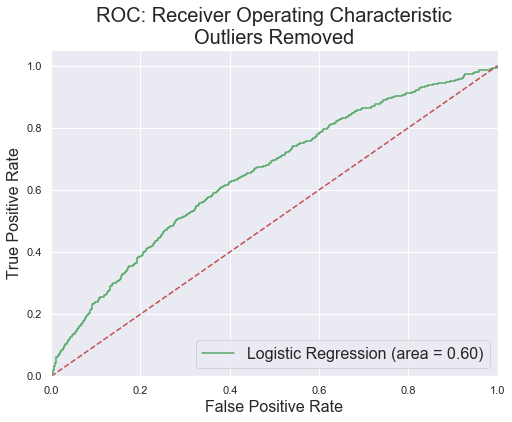

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t1, y_p_t1)
fpr, tpr, thresholds = roc_curve(y_t1, log_model1.predict_proba(X_t1)[::,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('ROC: Receiver Operating Characteristic\nOutliers Removed',fontsize=20)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

### Model is bad. Try first doing some feature selection.

In [59]:
dff.shape

(10793, 59)

In [60]:
for i in ['shares']:
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ_f = Q75+1.5*IQR
    sMinQ_f = max(Q25-1.5*IQR,0.0)
    print(sMinQ_f, sMaxQ_f)

0.0 3487.0


In [61]:
dff = dff[dff.shares<=round(sMaxQ,-2)]

In [62]:
dff.reset_index(drop=True, inplace=True)

In [63]:
ser, bins = pd.qcut(dff["shares"], 2, retbins=True, labels=['poor','good'])
dff['share_cat'] = pd.cut(dff["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [64]:
dff.drop(['shares'],axis=1,inplace=True)

In [76]:
X_tr2, X_t2, y_tr2,y_t2 = train_test_split(dff.drop('share_cat',axis=1), dff['share_cat'], test_size=0.2)

In [77]:
log_model2 = LogisticRegression(solver='liblinear') #lbfgs/liblinear is default

In [78]:
from sklearn.feature_selection import RFE

In [79]:
rfe1 = RFE(log_model2,n_features_to_select=8)

In [80]:
rfe1.fit(X_tr2,y_tr2)
print(rfe1.ranking_)
print(rfe1.support_)

[12 19 34 39 31 11 30  2 44 32 10 46  1 29  1  1  9  8 16 15 22 23 49 17
 18 13 14 21 20 25  6  4  5 28  1  1  1  3  1  1 26  7 50 35 47 51 27 24
 42 40 38 37 33 45 43 36 41 48]
[False False False False False False False False False False False False
  True False  True  True False False False False False False False False
 False False False False False False False False False False  True  True
  True False  True  True False False False False False False False False
 False False False False False False False False False False]


In [81]:
cols = X_tr2.columns[rfe1.support_]
cols

Index(['data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'weekday_is_saturday', 'weekday_is_sunday',
       'is_weekend', 'LDA_01', 'LDA_02'],
      dtype='object')

In [82]:
X_tr2, X_t2, y_tr2, y_t2 = train_test_split(dff[cols], dff['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [83]:
log_model2.fit(X_tr2,y_tr2)

y_p_tr2= log_model2.predict(X_tr2)
y_p_t2= log_model2.predict(X_t2)

acc_score_tr2 = accuracy_score(y_tr2, y_p_tr2)
acc_score_t2 = accuracy_score(y_t2, y_p_t2)

print("Acc Score on traning set: {}".format(acc_score_tr2))
print("Acc Score on testing set: {}".format(acc_score_t2)) 
print("")

bacc_score_tr2 = balanced_accuracy_score(y_tr2, y_p_tr2)
bacc_score_t2 = balanced_accuracy_score(y_t2, y_p_t2)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr2))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t2)) 
print("")

precision_tr2 = precision_score(y_tr2, y_p_tr2)
precision_t2 = precision_score(y_t2, y_p_t2)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr2, y_p_tr2)
recall_t2 = recall_score(y_t2, y_p_t2)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr2, y_p_tr2)
f1_score_t = f1_score(y_t2, y_p_t2)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6397919375812744
Acc Score on testing set: 0.62402496099844

Balanced Acc Score on traning set: 0.6158829024713008
Balanced Acc Score on testing set: 0.6082612020453114

Precision Score on training set: 0.6413887619917771
Precision Score on testing set: 0.6357388316151202

Recall Score on training set: 0.414281498967247
Recall Score on testing set: 0.4199772985244041

F1 Score on training set: 0.5034062387952671
F1 Score on testing set: 0.5058099794941899


In [84]:
confusion_matrix(y_t2, y_p_t2)

array([[830, 212],
       [511, 370]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_t2, y_p_t2))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70      1042
           1       0.64      0.42      0.51       881

   micro avg       0.62      0.62      0.62      1923
   macro avg       0.63      0.61      0.60      1923
weighted avg       0.63      0.62      0.61      1923



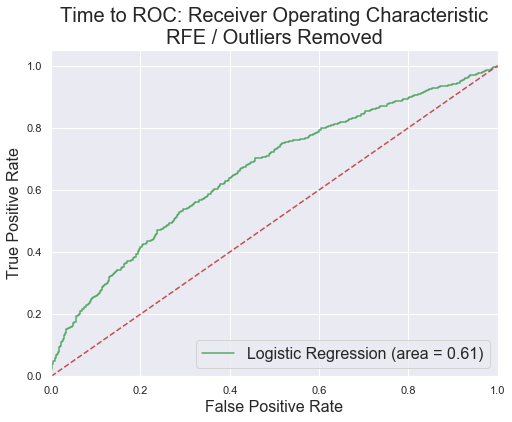

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t2, y_p_t2)
fpr, tpr, thresholds = roc_curve(y_t2, log_model2.predict_proba(X_t2)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nRFE / Outliers Removed',fontsize=20)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# What if we eliminated NO outliers...

In [96]:
df1 = df.copy()

In [97]:

df1.drop(['url','timedelta'],axis=1,inplace=True)
ser, bins = pd.qcut(df1["shares"], 2, retbins=True, labels=['poor','good'])
df1['share_cat'] = pd.cut(df1["shares"], bins=bins, labels=[0,1], include_lowest=True)
df1.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_cat
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [98]:
df1.drop(['shares'],axis=1,inplace=True)

In [93]:
df1['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [99]:
X_tr3a, X_t3a, y_tr3a, y_t3a = train_test_split(df1.drop('share_cat',axis=1), df1['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [100]:
log_model3 = LogisticRegression(solver='liblinear')
rfe3 = RFE(log_model3,n_features_to_select=8)
rfe3.fit(X_tr3a,y_tr3a)
print(rfe3.ranking_)
print(rfe3.support_)

[34 40  6 30  1 33 29 36 37 31 26  5  1  1  3 32  2 38 44 43 51 47 48 41
 42 39 46 49 45 25 21 20 22 11  8 12  1  1  4  1 17 16  1  9 50 35 10 28
 23  1 24 19 18 15 14  7 13 27]
[False False False False  True False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False  True False False  True False False False False False
 False  True False False False False False False False False]


In [101]:
cols = X_tr3a.columns[rfe3.support_]
X_tr3, X_t3, y_tr3, y_t3 = train_test_split(df1[cols], df1['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

Index(['n_non_stop_unique_tokens', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'is_weekend', 'LDA_00', 'LDA_02',
       'global_subjectivity', 'min_positive_polarity'],
      dtype='object')

In [102]:
log_model3.fit(X_tr3,y_tr3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
y_p_tr3= log_model3.predict(X_tr3)
y_p_t3= log_model3.predict(X_t3)

acc_score_tr3 = accuracy_score(y_tr3, y_p_tr3)
acc_score_t3 = accuracy_score(y_t3, y_p_t3)

print("Acc Score on traning set: {}".format(acc_score_tr3))
print("Acc Score on testing set: {}".format(acc_score_t3)) 
print("")

bacc_score_tr3 = balanced_accuracy_score(y_tr3, y_p_tr3)
bacc_score_t3 = balanced_accuracy_score(y_t3, y_p_t3)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr3))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t3)) 
print("")

precision_tr3 = precision_score(y_tr3, y_p_tr3)
precision_t3 = precision_score(y_t3, y_p_t3)

print("Precision Score on training set: {}".format(precision_tr3))
print("Precision Score on testing set: {}".format(precision_t3)) 
print("")

recall_tr3 = recall_score(y_tr3, y_p_tr3)
recall_t3 = recall_score(y_t3, y_p_t3)

print("Recall Score on training set: {}".format(recall_tr3))
print("Recall Score on testing set: {}".format(recall_t3)) 
print("")

f1_score_tr = f1_score(y_tr3, y_p_tr3)
f1_score_t = f1_score(y_t3, y_p_t3)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6247832256030269
Acc Score on testing set: 0.6212637154748392

Balanced Acc Score on traning set: 0.6248354045237341
Balanced Acc Score on testing set: 0.6214896871679864

Precision Score on training set: 0.6185973700688792
Precision Score on testing set: 0.6083063914449142

Recall Score on training set: 0.6297169811320755
Recall Score on testing set: 0.6313887454827052

F1 Score on training set: 0.6241076505148778
F1 Score on testing set: 0.6196326789107031


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_t3, y_p_t3))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      4055
           1       0.61      0.63      0.62      3874

   micro avg       0.62      0.62      0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



In [105]:
confusion_matrix(y_t3, y_p_t3)

array([[2480, 1575],
       [1428, 2446]], dtype=int64)

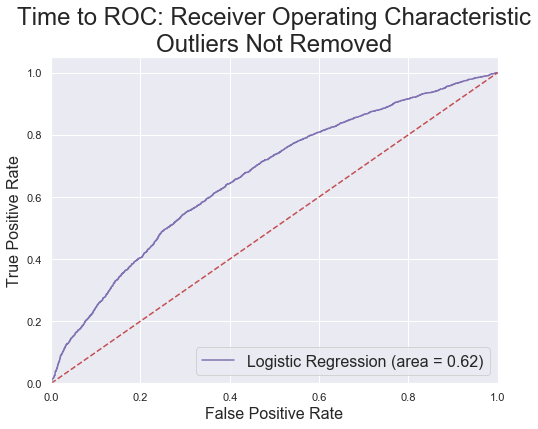

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t3, y_p_t3)
fpr, tpr, thresholds = roc_curve(y_t3, log_model3.predict_proba(X_t3)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='m' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_tr3,y_tr3)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [122]:
y_p_t_RF = ks_rf.predict(X_t3)
y_p_tr_RF = ks_rf.predict(X_tr3)
confusion_matrix(y_t3,y_p_t_RF)

array([[2755, 1300],
       [1918, 1956]], dtype=int64)

In [123]:
acc_score_tr3 = accuracy_score(y_tr3, y_p_tr_RF)
acc_score_t3 = accuracy_score(y_t3, y_p_t_RF)

print("Acc Score on traning set: {}".format(acc_score_tr3))
print("Acc Score on testing set: {}".format(acc_score_t3)) 
print("")

bacc_score_tr3 = balanced_accuracy_score(y_tr3, y_p_tr_RF)
bacc_score_t3 = balanced_accuracy_score(y_t3, y_p_t_RF)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr3))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t3)) 
print("")

precision_tr3 = precision_score(y_tr3, y_p_tr_RF)
precision_t3 = precision_score(y_t3, y_p_t_RF)

print("Precision Score on training set: {}".format(precision_tr3))
print("Precision Score on testing set: {}".format(precision_t3)) 
print("")

recall_tr3 = recall_score(y_tr3, y_p_tr_RF)
recall_t3 = recall_score(y_t3, y_p_t_RF)

print("Recall Score on training set: {}".format(recall_tr3))
print("Recall Score on testing set: {}".format(recall_t3)) 
print("")

f1_score_tr = f1_score(y_tr3, y_p_tr_RF)
f1_score_t = f1_score(y_t3, y_p_t_RF)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.9790320037836986
Acc Score on testing set: 0.5941480640686089

Balanced Acc Score on traning set: 0.9789119704678619
Balanced Acc Score on testing set: 0.5921563147913913

Precision Score on training set: 0.9896994588956255
Precision Score on testing set: 0.6007371007371007

Recall Score on training set: 0.9676823049464559
Recall Score on testing set: 0.5049044914816727

F1 Score on training set: 0.9785670545009185
F1 Score on testing set: 0.5486676016830294


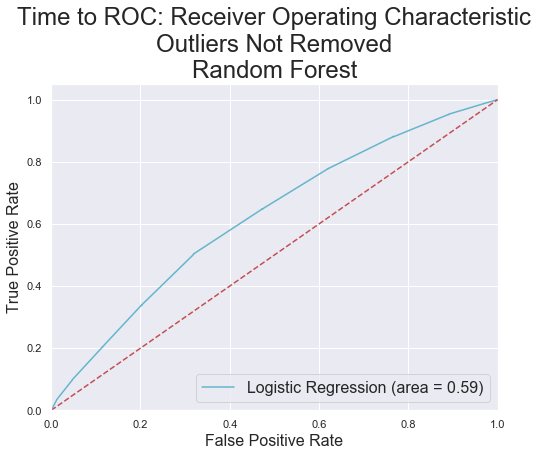

In [109]:
y_pred_proba_RF = ks_rf.predict_proba(X_t3)[:,1]

logit_roc_auc = roc_auc_score(y_t3, y_p_t_RF)

fpr, tpr, thresholds = roc_curve(y_t3, y_pred_proba_RF)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed\nRandom Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()


## Random Forest with Outliers Removed

In [110]:
df2 = df.copy()

columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,df2)
    df2 = df2[(df2[n]<=q[1]) & (df2[n]>=q[0])  ]

n_tokens_title
3.0 17.0
n_tokens_content
-460.0 1422.0
num_hrefs
-11.0 27.0
num_self_hrefs
-5.0 9.0
num_imgs
-1.0 5.0
num_videos
-3.0 3.0
num_keywords
1.0 15.0
kw_min_min
-9.0 13.0
kw_max_min
-419.0 1851.0
kw_avg_min
-127.0 533.0
kw_min_max
-12601.0 21001.0
kw_max_max
843299.0 843301.0
kw_avg_max
9624.0 521906.0
kw_min_avg
-2367.0 3944.0
kw_max_avg
887.0 7933.0
kw_avg_avg
1092.0 4223.0
self_reference_min_shares
-1896.0 4978.0
self_reference_max_shares
-4169.0 9221.0
self_reference_avg_sharess
-1876.0 4966.0


In [111]:
sMaxQ

3477.25

In [112]:
df2 = df2[df2.shares<=sMaxQ+1000]
df2.reset_index(drop=True, inplace=True)
df2.drop(['url','timedelta'],axis=1,inplace=True)


ser, bins = pd.qcut(df2["shares"], 2, retbins=True, labels=['poor','good'])
df2['share_cat'] = pd.cut(df2["shares"], bins=bins, labels=[0,1], include_lowest=True)
df2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_cat
0,8.0,166.0,0.644172,1.0,0.838384,5.0,1.0,0.0,0.0,4.993976,...,0.5,0.000000,0.0,0.000,0.000,0.000,0.500,0.000,2600,1
1,10.0,847.0,0.424608,1.0,0.604167,8.0,0.0,1.0,0.0,4.853601,...,1.0,-0.185049,-0.4,-0.125,0.225,-0.175,0.275,0.175,186,0
2,7.0,245.0,0.616667,1.0,0.762821,8.0,5.0,1.0,0.0,4.767347,...,0.5,-0.341667,-0.5,-0.125,0.000,0.000,0.500,0.000,1000,0
3,11.0,107.0,0.761905,1.0,0.893939,3.0,1.0,0.0,2.0,4.383178,...,1.0,0.000000,0.0,0.000,0.400,-0.300,0.100,0.300,805,0
4,8.0,205.0,0.648780,1.0,0.760563,7.0,3.0,1.0,0.0,5.565854,...,0.6,-0.508333,-0.9,-0.125,0.000,0.000,0.500,0.000,791,0


In [113]:
df2.drop(['shares'],axis=1,inplace=True)

In [114]:
X_tr4a, X_t4a, y_tr4a,y_t4a = train_test_split(df2.drop('share_cat',axis=1), df2['share_cat'], test_size=0.2)

In [115]:
log_model4 = LogisticRegression(solver='liblinear')

rfe4 = RFE(log_model4,n_features_to_select=8)
rfe4.fit(X_tr4a,y_tr4a)
print(rfe4.ranking_)
print(rfe4.support_)

[23 29  1 43  6 26 27 11 14 25 21 50  7  8  1  1  9 19 34 31 37 38 40 32
 33 28 30 36 35 18 17 15 16  4  3  5  1  2  1  1 22 13 45  1 46 47  1 10
 44 41 39 12 24 51 42 20 49 48]
[False False  True False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
  True False  True  True False False False  True False False  True False
 False False False False False False False False False False]


In [116]:
cols = X_tr4a.columns[rfe4.support_]
X_tr4, X_t4, y_tr4, y_t4 = train_test_split(df2[cols], df2['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

Index(['n_unique_tokens', 'data_channel_is_socmed', 'data_channel_is_tech',
       'is_weekend', 'LDA_01', 'LDA_02', 'global_sentiment_polarity',
       'rate_positive_words'],
      dtype='object')

In [117]:


ks_rf4 = RandomForestClassifier().fit(X_tr4,y_tr4)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [120]:
y_p_t_RF4 = ks_rf4.predict(X_t4)
y_p_tr_RF4 = ks_rf4.predict(X_tr4)
confusion_matrix(y_t4,y_p_t_RF4)

array([[760, 295],
       [502, 430]], dtype=int64)

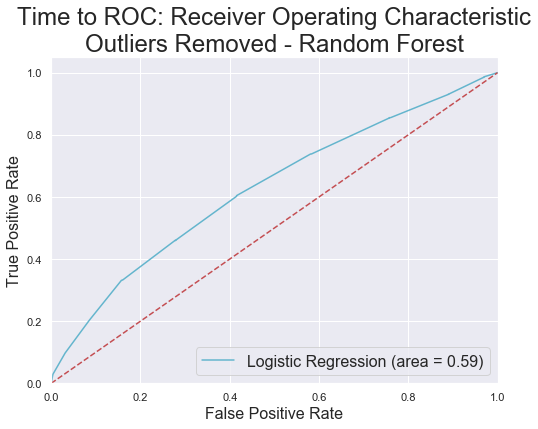

In [119]:
y_pred_proba_RF4 = ks_rf4.predict_proba(X_t4)[:,1]

logit_roc_auc = roc_auc_score(y_t4, y_p_t_RF4)

fpr, tpr, thresholds = roc_curve(y_t4, y_pred_proba_RF4)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Removed - Random Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

In [121]:
acc_score_tr3 = accuracy_score(y_tr4, y_p_tr_RF4)
acc_score_t3 = accuracy_score(y_t4, y_p_t_RF4)

print("Acc Score on traning set: {}".format(acc_score_tr3))
print("Acc Score on testing set: {}".format(acc_score_t3)) 
print("")

bacc_score_tr3 = balanced_accuracy_score(y_tr4, y_p_tr_RF4)
bacc_score_t3 = balanced_accuracy_score(y_t4, y_p_t_RF4)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr3))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t3)) 
print("")

precision_tr3 = precision_score(y_tr4, y_p_tr_RF4)
precision_t3 = precision_score(y_t4, y_p_t_RF4)

print("Precision Score on training set: {}".format(precision_tr3))
print("Precision Score on testing set: {}".format(precision_t3)) 
print("")

recall_tr3 = recall_score(y_tr4, y_p_tr_RF4)
recall_t3 = recall_score(y_t4, y_p_t_RF4)

print("Recall Score on training set: {}".format(recall_tr3))
print("Recall Score on testing set: {}".format(recall_t3)) 
print("")

f1_score_tr = f1_score(y_tr4, y_p_tr_RF4)
f1_score_t = f1_score(y_t4, y_p_t_RF4)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.9821316219957217
Acc Score on testing set: 0.5988928032209361

Balanced Acc Score on traning set: 0.9809165092819586
Balanced Acc Score on testing set: 0.5908762687386856

Precision Score on training set: 0.9954916877993801
Precision Score on testing set: 0.593103448275862

Recall Score on training set: 0.9655643618474993
Recall Score on testing set: 0.4613733905579399

F1 Score on training set: 0.980299667036626
F1 Score on testing set: 0.5190102595051298


# Support Vector Machines

In [1]:
from sklearn import svm

In [2]:
clf = svm.SVC(gamma='auto')
clf.fit(X_tr1, y_tr1)

NameError: name 'X_tr1' is not defined

In [ ]:
clf.score(X_t1, y_t1)

In [4]:


pd.DataFrame()

NameError: name 'pd' is not defined